## DS 160 Final Project
---
**Author:** Morgan Hardin  
**Version:** 1.0  
**Semester:** Spring 2024 

This *notebook* contains my solution(s) to **DS 160 Final Project**

- Importing the Libraries
- Importing Dataset
- Exploratory Analysis
- Multiple Linear Regression
- Logistic Regression

### Importing the Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

### Importing the Dataset

In [2]:
data = pd.read_csv("HR_dataset.csv")

### Exploratory Analysis - Exploring the Dataset

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
data.sample()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
7052,0.73,0.63,3,172,4,1,0,0,accounting,low


In [8]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
data.shape

(14999, 10)

In [10]:
data['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [11]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Results: These show that the dataset has 10 columns and 14999 rows. There are no missing values in any of the columns. There are 2 columns that are a float64 data type, 6 columns that are an int64 data type, and 2 columns that are object data types. These means that there are 8 numerical columns and 2 categorical columns. The 'satisfaction_level' and 'last_evaluation' columns are numerical, continuous, and ratio data because there is a range from 0, or a true zero, to 1 and can have any value within this range. The 'number_project', 'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left', and 'promotion_last_5years' columns are numerical, discrete, and ratio data because they are whole numbers that represent the count of an employees information in that column and there is an absolute zero. The 'Department' column is categorical and nominal because there is no order to the entries. The 'salary' column is categorical and ordinal because there is an order to the entries. 

Hypothesis: The independent variables for this dataset will be the 'satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department', and 'salary'. The depedent variable for this dataset will be the left' column to see what variables impact if an employee will leave a company. The original hypothesis is that if an employee has a low satisfaction and evaluation level, has not been at the company long, if they have had a work accident, and if their salary is low, then they are more likely to leave the company.

### Exploratory Analysis - Correlation Matrix

In [12]:
corr = data.corr()
print(corr)

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours         

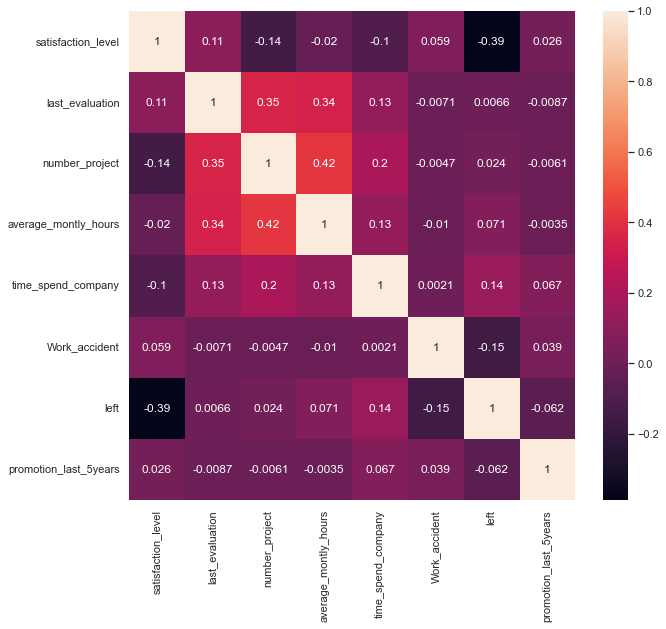

In [13]:
sns.set(rc = {'figure.figsize': (10, 9)})
sns.heatmap(corr, annot = True)
plt.show()

Results: This correlation matrix shows that the 'satisfaction_level', 'Work_accident', and 'promotion_last_5years' all have a negative correlation on if an employee left or not. This is an interesting find since in the original hypothesis, it was believed that salary would have a negative impact on an employee leaving. It makes since that a promotion might cause an employee to leave because they may feel stuck at their job and want to keep moving up to get a higher salary, but they cannot do that if they are not promoted which could lead them to leave their job. It was also found that the more projects an employee has, the more average monthly hours they have. These have a positive correlation between one another which could indicate that they need to put more hours in to finish their projects. It is also interesting to see that the number of projects has a somewhat weak, but positive correlation on 'last_evaluation'. This makes sense because if an employee performed well on their projects, then they are more likely to get a better evaluation score. All of the other categories did not have much of a significant impact on one other, so the most important were discussed.

### Exploratory Analysis - Preprocessing

In [14]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

Results: There are no missing values so no values need to be imputed in this dataset before moving on to graphical analysis.

### Exploratory Analysis - Graphical Line Plot Analysis

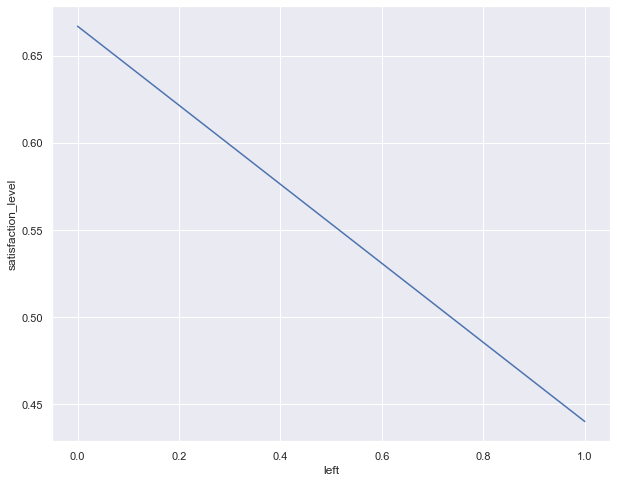

In [15]:
sns.set(rc = {'figure.figsize': (10, 8)})
sns.lineplot(x = 'left', y = 'satisfaction_level', ci = None, data = data)
plt.show()

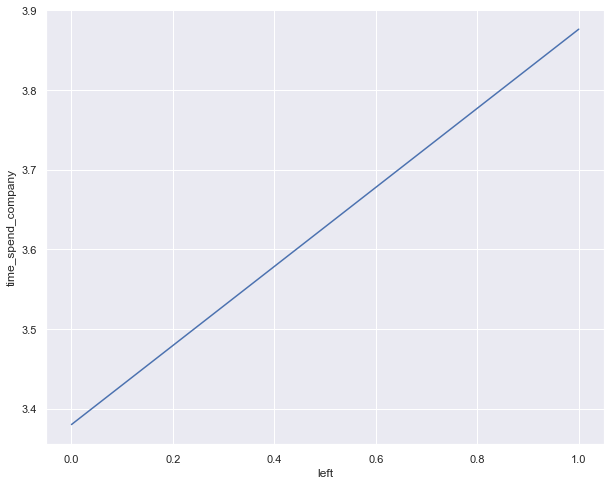

In [16]:
sns.set(rc = {'figure.figsize': (10, 8)})
sns.lineplot(x = 'left', y = 'time_spend_company', ci = None, data = data)
plt.show()

Results: These line plots show that there is a linear correlation between if an employee left and their satisfaction level, and if an employee left and if the time they spent at the company. These graphs show that the lower the satisfaction level, the more likely a person will leave their job. The second graph shows that the less time an employee spends at a company, the more likely they will leave the company.

### Exploratory Analysis - Graphical Scatter Plot Analysis

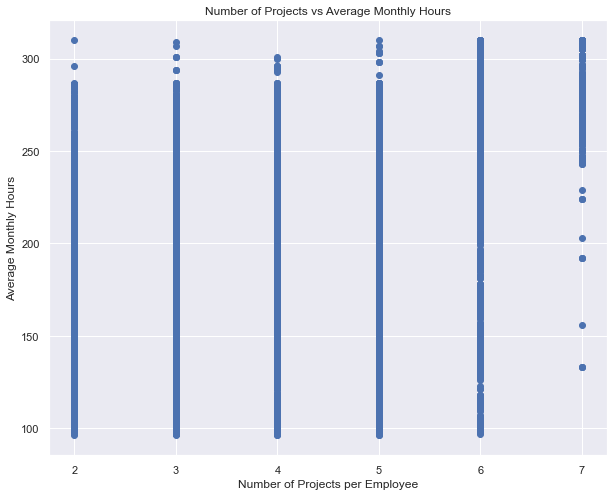

In [17]:
plt.scatter(data['number_project'], 
           data['average_montly_hours'])
plt.xlabel('Number of Projects per Employee')
plt.ylabel('Average Monthly Hours')
plt.title('Number of Projects vs Average Monthly Hours')
plt.grid(True)
plt.show()

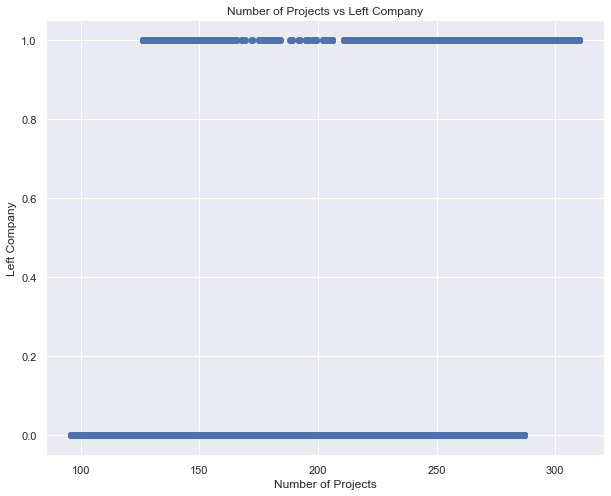

In [18]:
plt.scatter(data['average_montly_hours'], 
           data['left'])
plt.xlabel('Number of Projects')
plt.ylabel('Left Company')
plt.title('Number of Projects vs Left Company')
plt.grid(True)
plt.show()

Results: These scatter plots show that the more projects an employee has, the more hours they will put in monthly. This can be seen from the majority of the plots being toward the bottom for the number of projects from 2 to 5. At 6, the majority begins to be found at the top of the hours range. At 7, there are a few outliers, but the majority put in between 240 and 320 hours a month. From the bottom scatter plot of Number of Projects vs Left Company, it is clear that the more projects an employee has, the less more likely they will leave the company. This can be seen from the majority of the projects between 75 and 275 all leaving the company. If a person left the company, none had fewer than 125 projects and there was a little bit of a gap in the middle where some employees stayed, even if they had an average number of projects. From this, it is clear that an employee will likely leave if they have more projects to work on and more hours to put in monthly.

### Exploratory Analysis - Graphical Pie Plot Analysis

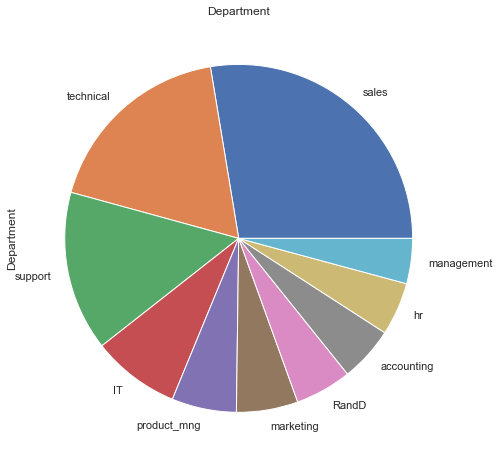

In [19]:
data['Department'].value_counts().plot(kind = 'pie')
plt.title('Department')
plt.show()

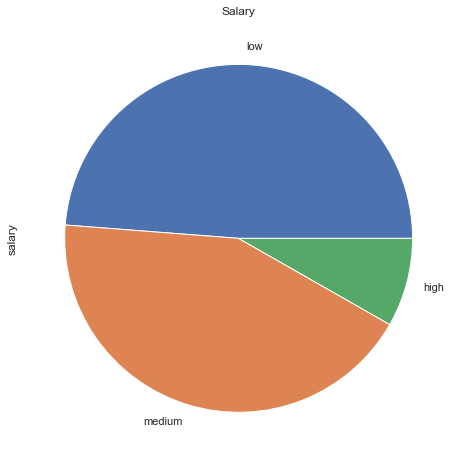

In [20]:
data['salary'].value_counts().plot(kind = 'pie')
plt.title('Salary')
plt.show()

Results: These pie plots show that there is mostly an even distribution between the smaller departments, but sales, technical, and support are the biggest departments. The pie plot for salary shows that there is about an even distribution between low and medium salaries, but there are a lot less high salaries. This all makes sense because the bigger departments will likely have a lower pay because the departments are bigger and don't necessarily require as much education and experience. For example, the sales department needs more people and does not require as much experience, so it does not pay as much. The accounting department requires education and skill and is a smaller department, so it is likely to pay more. So, the bigger the department, the more likely the pay will be low or medium. The smaller the department, the more likely the pay will be higher. With this being said, this is from these pie plots and depends on lots of other variables that are not listed or in this dataset.

### Exploratory Analysis - Graphical Bar Plot Analysis

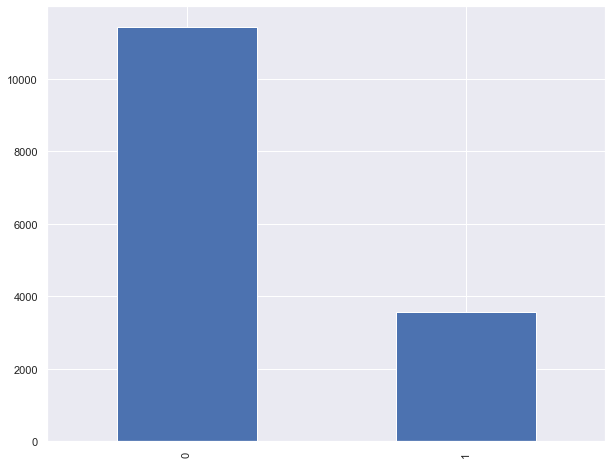

In [21]:
data['left'].value_counts().plot(kind = 'bar')
plt.show()

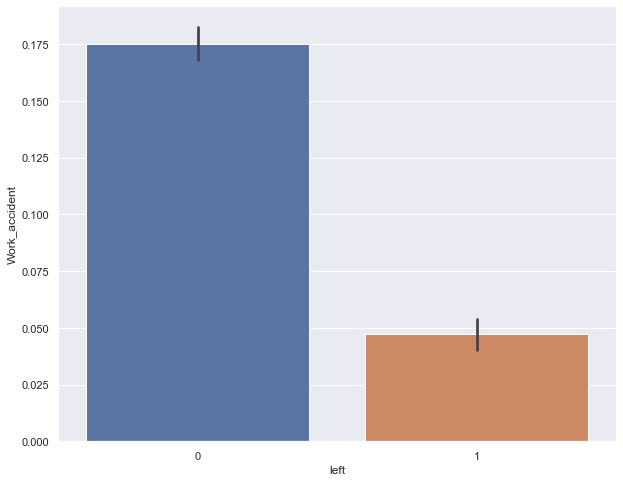

In [22]:
sns.barplot(x = 'left', y = 'Work_accident', data = data)
plt.show()

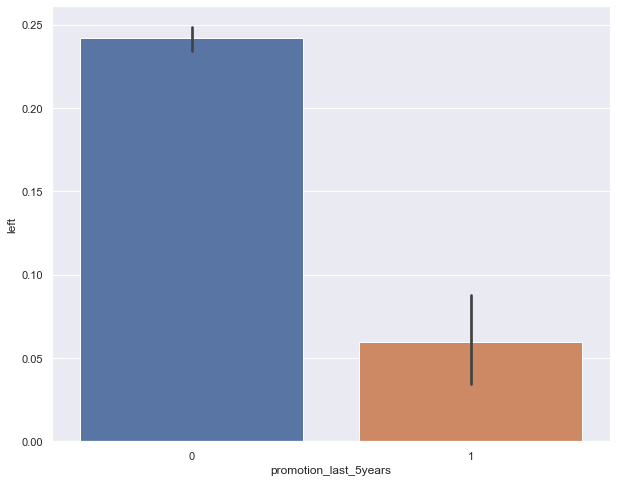

In [23]:
sns.barplot(x = 'promotion_last_5years', y = 'left', data = data)
plt.show()

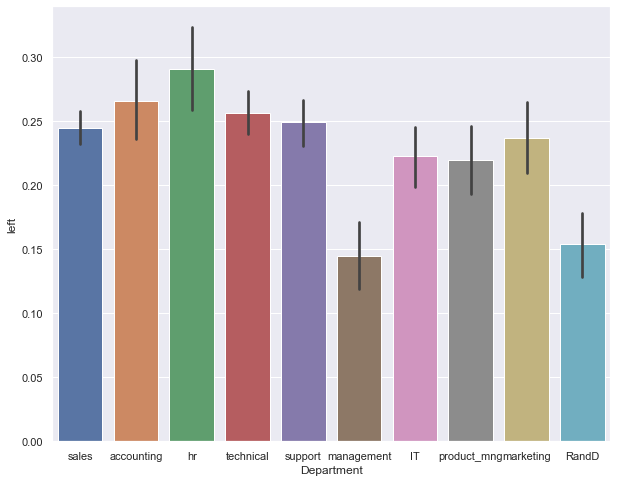

In [24]:
sns.barplot(x = 'Department', y = 'left', data = data)
plt.show()

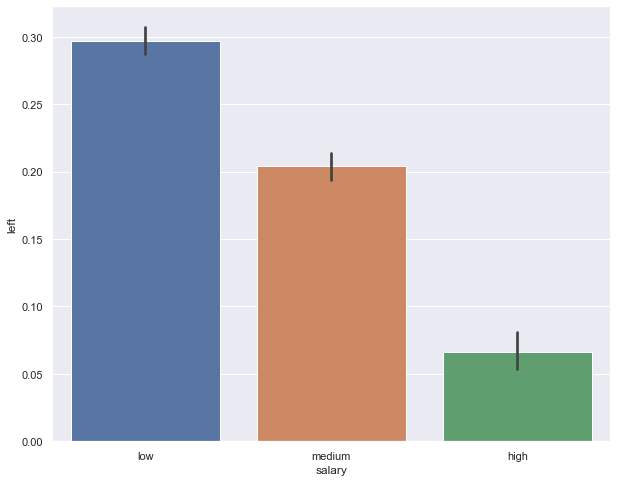

In [25]:
sns.barplot(x = 'salary', y = 'left', data = data)
plt.show()

Results: These bar graphs show that the values are skewed and there are more 0's than 1's in the dataset. This means that more people stayed at the company in this dataset than left. It also shows that the majority of people who had work related accidents and had not been promoted in the last 5 years left the company. The employees in the HR, accounting, and technical departments were the ones who left their job the most. It also states that low salaries were the ones that left their jobs the most. This could mean that employees in HR, accounting, and technical left their jobs due to their salaries or not being promoted.

### Exploratory Analysis - Graphical Histogram Plot Analysis

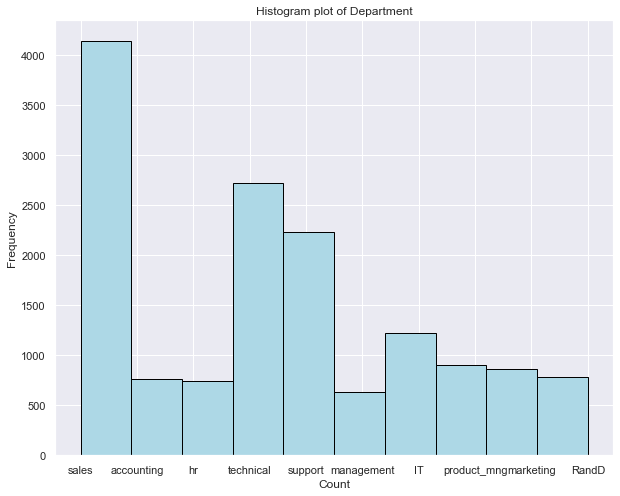

In [26]:
plt.hist(data['Department'],
        facecolor="lightblue",
        edgecolor="black",
        bins=10)
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.title("Histogram plot of Department")
plt.show()

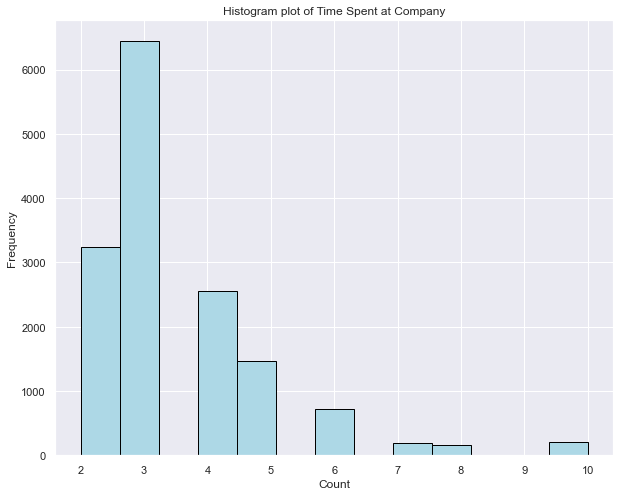

In [27]:
plt.hist(data['time_spend_company'],
        facecolor="lightblue",
        edgecolor="black",
        bins=13)
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.title("Histogram plot of Time Spent at Company")
plt.show()

Results: These histograms show that sales, technical, and support are the biggest departments. This matches the pie plot with these departments being the biggest. The sales department has about 4250 employees, the technical department has around 2600 employees, and the support department has about 2250 employees. The other histogram also shows that most employees have been with the company around 3 years. The graph is right skewed, so most of the employees fall between the 2 and 5 year range. This could mean that most people leave the company after about 5 years of being employed, so it is likely that they are coming from either the sales, technical, or support departments since they have the most employees.

### Exploratory Analysis - Graphical Violin and Histogram Plot Analysis

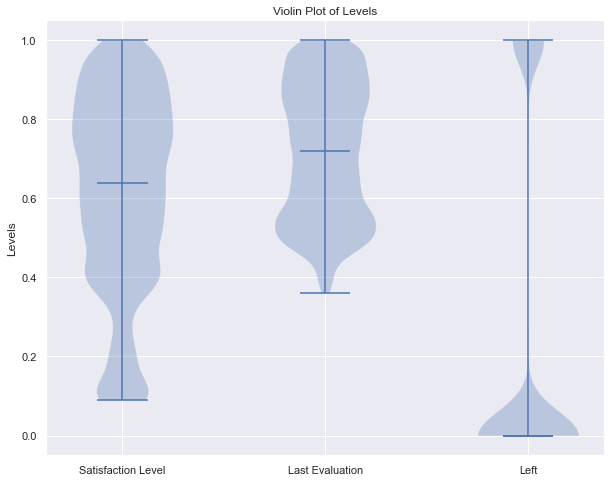

In [28]:
data_levels = data[['satisfaction_level', 'last_evaluation', 'left']]
plt.violinplot(data_levels, showmedians = True)
plt.xticks([1, 2, 3],['Satisfaction Level', 'Last Evaluation', 'Left'])
plt.title("Violin Plot of Levels")
plt.ylabel("Levels")
plt.show()

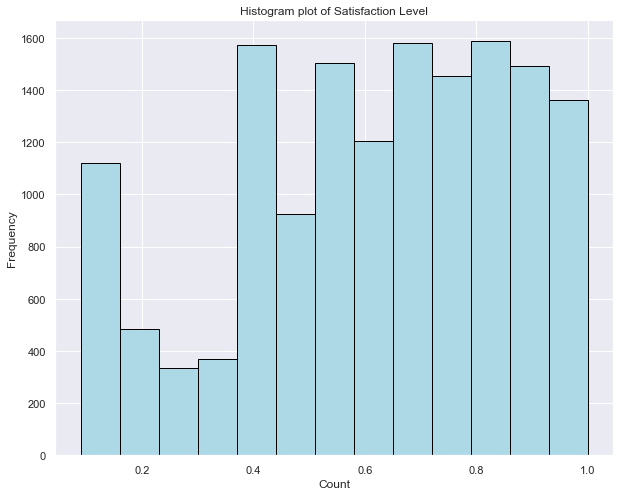

In [29]:
plt.hist(data['satisfaction_level'],
        facecolor="lightblue",
        edgecolor="black",
        bins=13)
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.title("Histogram plot of Satisfaction Level")
plt.show()

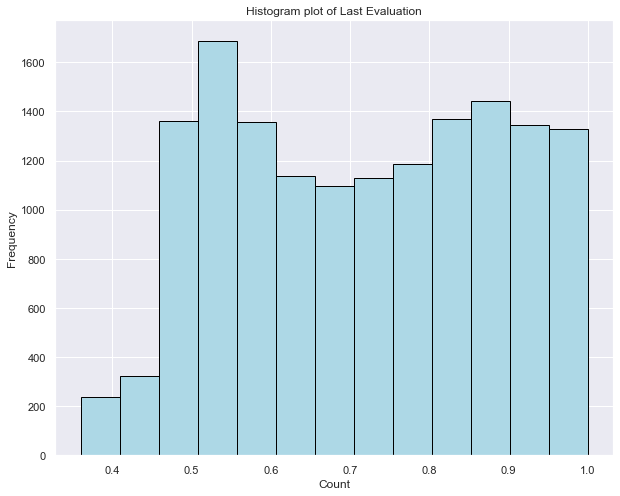

In [30]:
plt.hist(data['last_evaluation'],
        facecolor="lightblue",
        edgecolor="black",
        bins=13)
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.title("Histogram plot of Last Evaluation")
plt.show()

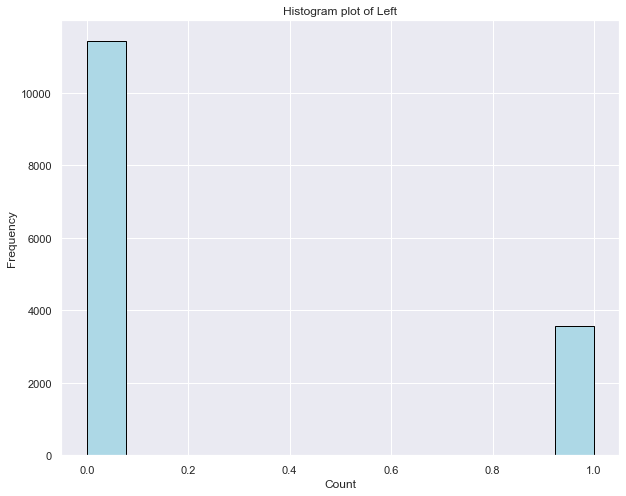

In [31]:
plt.hist(data['left'],
        facecolor="lightblue",
        edgecolor="black",
        bins=13)
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.title("Histogram plot of Left")
plt.show()

Results: The violin and histogram plots show that an employees satisfaction level matches roughly to what their last evaluation level was. The higher their satisfaction level is, the higher their last evaluation level was. This means that they are less likely to leave the company. If the satisfaction level was low, it might mean that their last evaluation level was low and that they are more likely to leave the company. This can be seen with both the violin plots and the left skewed histograms for both satisfaction level and last evaluation compared to leaving the company. This means that the higher the level, the less likely they will leave the company.

### Regression: Splitting Data into Independent and Dependent Variables

In [32]:
x = data.drop('left', axis = 1)
y = data[['left']]

In [48]:
x.sample()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
2094,0.48,0.56,2,151,3,0,0,0,0,1,0,0,0,0,0,0,0,1


In [34]:
y.sample()

,left
4494,0


Results: This sets the independent variables equal to x and drops the dependent variable. The dependent variable is stored in its own variable named y.

### Regression: Handling Categorical Variables

In [35]:
x = pd.get_dummies(x, drop_first = True)

In [49]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [37]:
y.head()

,left
0,1
1,1
2,1
3,1
4,1


Results: This uses get dummies to handle the categorical variables and encode them into 0's and 1's, or integers. This way it allows the dataset to be prepared for being trained and tested using Logistic Regression. The y variable does not need to be encoded since it is already in 0's and 1's where 0 means 

- Salary:
    - salary_low: 100
    - salary_medium: 010
    - salary_high: 000
- Departments: 
    - Department_RandD: 0100000000
    - Department_accounting: 0010000000
    - Department_hr: 0001000000
    - Department_management: 0000100000
    - Department_marketing: 0000010000
    - Department_product_mng: 0000001000
    - Department_sales: 0000000100
    - Department_support: 0000000010
    - Department_technical: 0000000001
    - Department_it: 0000000000
- Left:
    - 0 means Stayed at Company
    - 1 means Left the Company

### Splitting Data into the Training Set and Test Set

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

### Logistic Regression

In [157]:
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(x_train, y_train.values.ravel())

LogisticRegression(max_iter=1000)

### Confusion Matrix and Classification Report

In [158]:
y_pred = classifier.predict(x_test)

In [159]:
cm = confusion_matrix(y_test, y_pred)

In [160]:
cm

array([[3202,  260],
       [ 681,  357]])

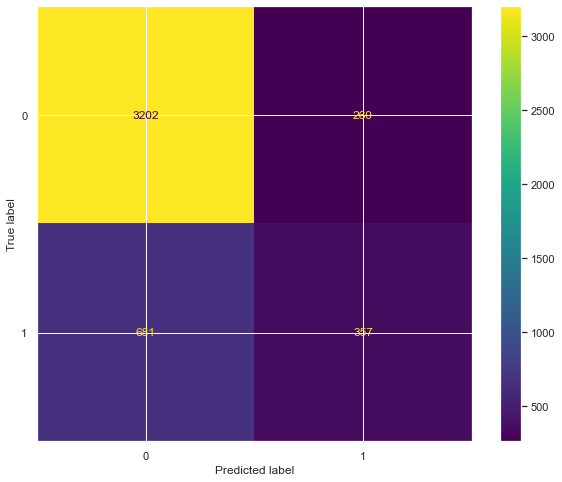

In [161]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [162]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3462
           1       0.58      0.34      0.43      1038

    accuracy                           0.79      4500
   macro avg       0.70      0.63      0.65      4500
weighted avg       0.77      0.79      0.77      4500



Accuracy Scores (All with max_iter = 1000):
- Test Size, Random State --> Accuracy Percentage
- 0.15, 42 --> 78%
- 0.15, 20 --> 80%
- 0.15, 0 --> 79%
- 0.20, 42 --> 78%
- 0.20, 20 --> 79%
- 0.20, 0 --> 79%
- 0.30, 42 --> 78%
- 0.30, 20 --> 79%
- 0.30, 0 --> 79%

Results: This shows that the model trained pretty well with 80% being the highest test case with a test size of 0.15 and a random state of 20. The model could have trained better, but the distribution of 0's and 1's was skewed and there were more than 3 times as many 0's as there were 1's. There were also 1610 true negatives, 339 false negatives, 115 false positives, and 186 true positives. Therefore, it did a better job of predicting if an employee would stay than it did for an employee leaving. 

### Summary

Overall, an employee's satisfaction level and if they received a promotion in the last 5 years played the most important role in determining if an employee would leave a company or not. All of the independent variables were extremely helpful in this dataset and showed a correlation between leaving or not. The satisfaction level showed that the higher an employee's satisfaction, then the higher their last evaluation was and the less likely they will leave the company. It was also found that the more projects an employee has, the more hours they will be putting in monthly and the more likely they are to leave the company. This all makes sense because they are putting lots of hours in and very overwhelmed so their satisfaction level drops and can cause their evaluation to fall, meaning they are more likely to leave the company. It was also discovered that most employees who leave have not been at the company long and have been there between 2 and 5 years. This makes sense that the range is up to 5 years because if an employee had not been promoted in 5 years, they will likely leave the company. Also, accidents while at work did play a small roll, but not a huge one. It indicated that work accidents have a negative correlation with leaving so if a person had an accident, they will likely leave. The departments who had the most employees leave was hr, accounting, and technical. It is likely that these departments do not get paid as much or their satisfaction levels were low. Finally, the salary played a pretty big role in indicating if a person would leave. It was found that the lower the salary, the more likely an employee will leave. The model also trained pretty well at 80% and did a decent job of predicting if an employee would leave or not. The model did better at predicting 0's, if an employee stayed, than 1's, if they left. This might be because there are more 0's than 1's in the dataset, leaving it skewed. This model could be more accurate if there was a more even distribution of 0's and 1's so it can train more accurately to predict if an employee would leave the company. In conclusion, the hypothesis was correct and the model trained pretty well at 80% accuracy.